In [179]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score

In [141]:
data = pd.read_csv('../data/Telco-Customer-Churn-encoded-data-FE.csv')
label = pd.read_csv('../data/Telco-Customer-Churn-encoded-label.csv').iloc[:,-1]
data

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,tenure_group,Monthly/Total_Charges,TotalCharges/tenure
0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,29.85,29.85,0,1.000000,29.850000
1,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,34,56.95,1889.50,2,0.030140,55.573529
2,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,2,53.85,108.15,0,0.497920,54.075000
3,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,45,42.30,1840.75,3,0.022980,40.905556
4,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,2,70.70,151.65,0,0.466205,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,0,0,1,1,0,...,0,0,0,1,24,84.80,1990.50,1,0.042602,82.937500
7039,0,0,1,1,1,0,0,1,0,1,...,0,1,0,0,72,103.20,7362.90,5,0.014016,102.262500
7040,0,0,1,1,0,0,1,0,1,0,...,0,0,1,0,11,29.60,346.45,0,0.085438,31.495455
7041,1,1,1,0,1,0,0,1,0,1,...,0,0,0,1,4,74.40,306.60,0,0.242661,76.650000


In [142]:
# label  = np.where(label == 'Yes', 1, 0)
# label = pd.DataFrame(label,columns=['Churn'])
# label

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Male                              7043 non-null   int64  
 1   SeniorCitizen_1                          7043 non-null   int64  
 2   Partner_Yes                              7043 non-null   int64  
 3   Dependents_Yes                           7043 non-null   int64  
 4   PhoneService_Yes                         7043 non-null   int64  
 5   MultipleLines_No                         7043 non-null   int64  
 6   MultipleLines_No phone service           7043 non-null   int64  
 7   MultipleLines_Yes                        7043 non-null   int64  
 8   InternetService_DSL                      7043 non-null   int64  
 9   InternetService_Fiber optic              7043 non-null   int64  
 10  InternetService_No                       7043 no

In [144]:
def PCA_n(data, labels, num_components, Normalize = True):
    # Separate features and labels
    X = data
    y = labels

    # Standardize the data (important for PCA)
    if Normalize:
        X_standardized = StandardScaler().fit_transform(X)
    else:
        X_standardized = X

    # Apply PCA
    # num_components = 3  # You can choose the number of components based on your requirement
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(X_standardized)

    # Create a DataFrame with the principal components and labels
    columns = [f'PC{i}' for i in range(1,num_components+1)]

    
    principal_df = pd.DataFrame(data=principal_components, columns=columns)
    final_df = pd.concat([principal_df, y], axis=1)
    return final_df
    # print(final_df3)

In [145]:
pca_2 = PCA_n(data, label, 2)
pca_2

,PC1,PC2,Churn
0,-0.939596,-4.271775,0
1,-0.312433,-0.882542,0
2,-0.361856,-3.232287,1
3,-0.749030,0.401097,0
4,-1.459155,-4.433344,1
...,...,...,...
7038,-1.476602,2.119840,0
7039,-2.985269,4.081174,0
7040,-0.876803,-3.203784,0
7041,-1.694245,-3.313481,1


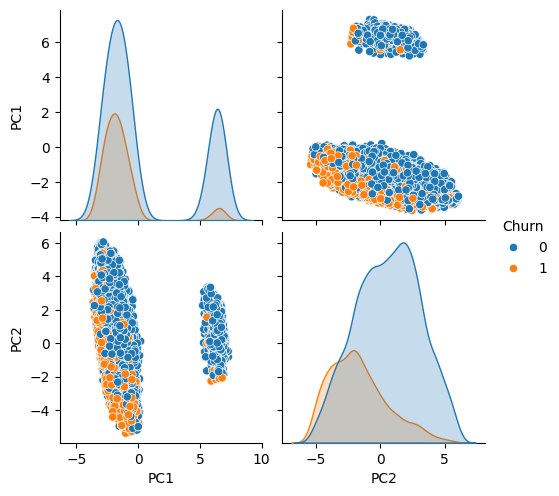

In [146]:
sns.pairplot(pca_2, hue = 'Churn')

In [115]:
pca_3 = PCA_n(data, label, 3)
pca_3

,PC1,PC2,PC3,Churn
0,-1.048376,-4.614496,3.623153,1
1,5.417170,0.708810,-1.306208,0
2,6.680162,1.688379,0.020646,0
3,-1.434900,-3.975867,-0.943999,1
4,-0.608835,0.627196,2.804634,0
...,...,...,...,...
1002,-0.984183,-2.252377,1.460484,0
1003,6.768204,-0.028755,-0.265835,0
1004,6.547811,-1.804814,-0.755327,0
1005,-0.943388,-4.613815,1.055406,0


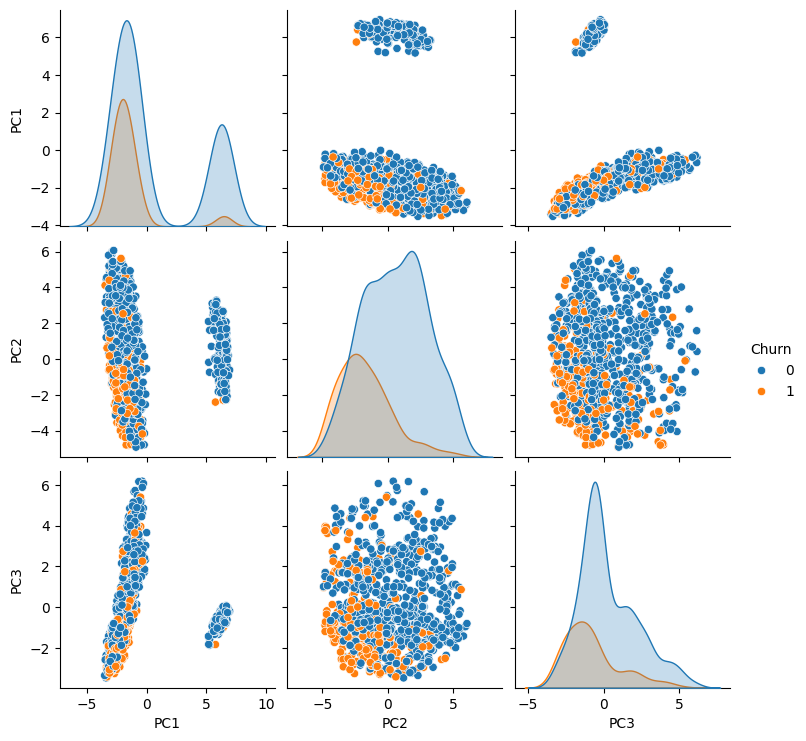

In [148]:
sns.pairplot(pca_3, hue = 'Churn')

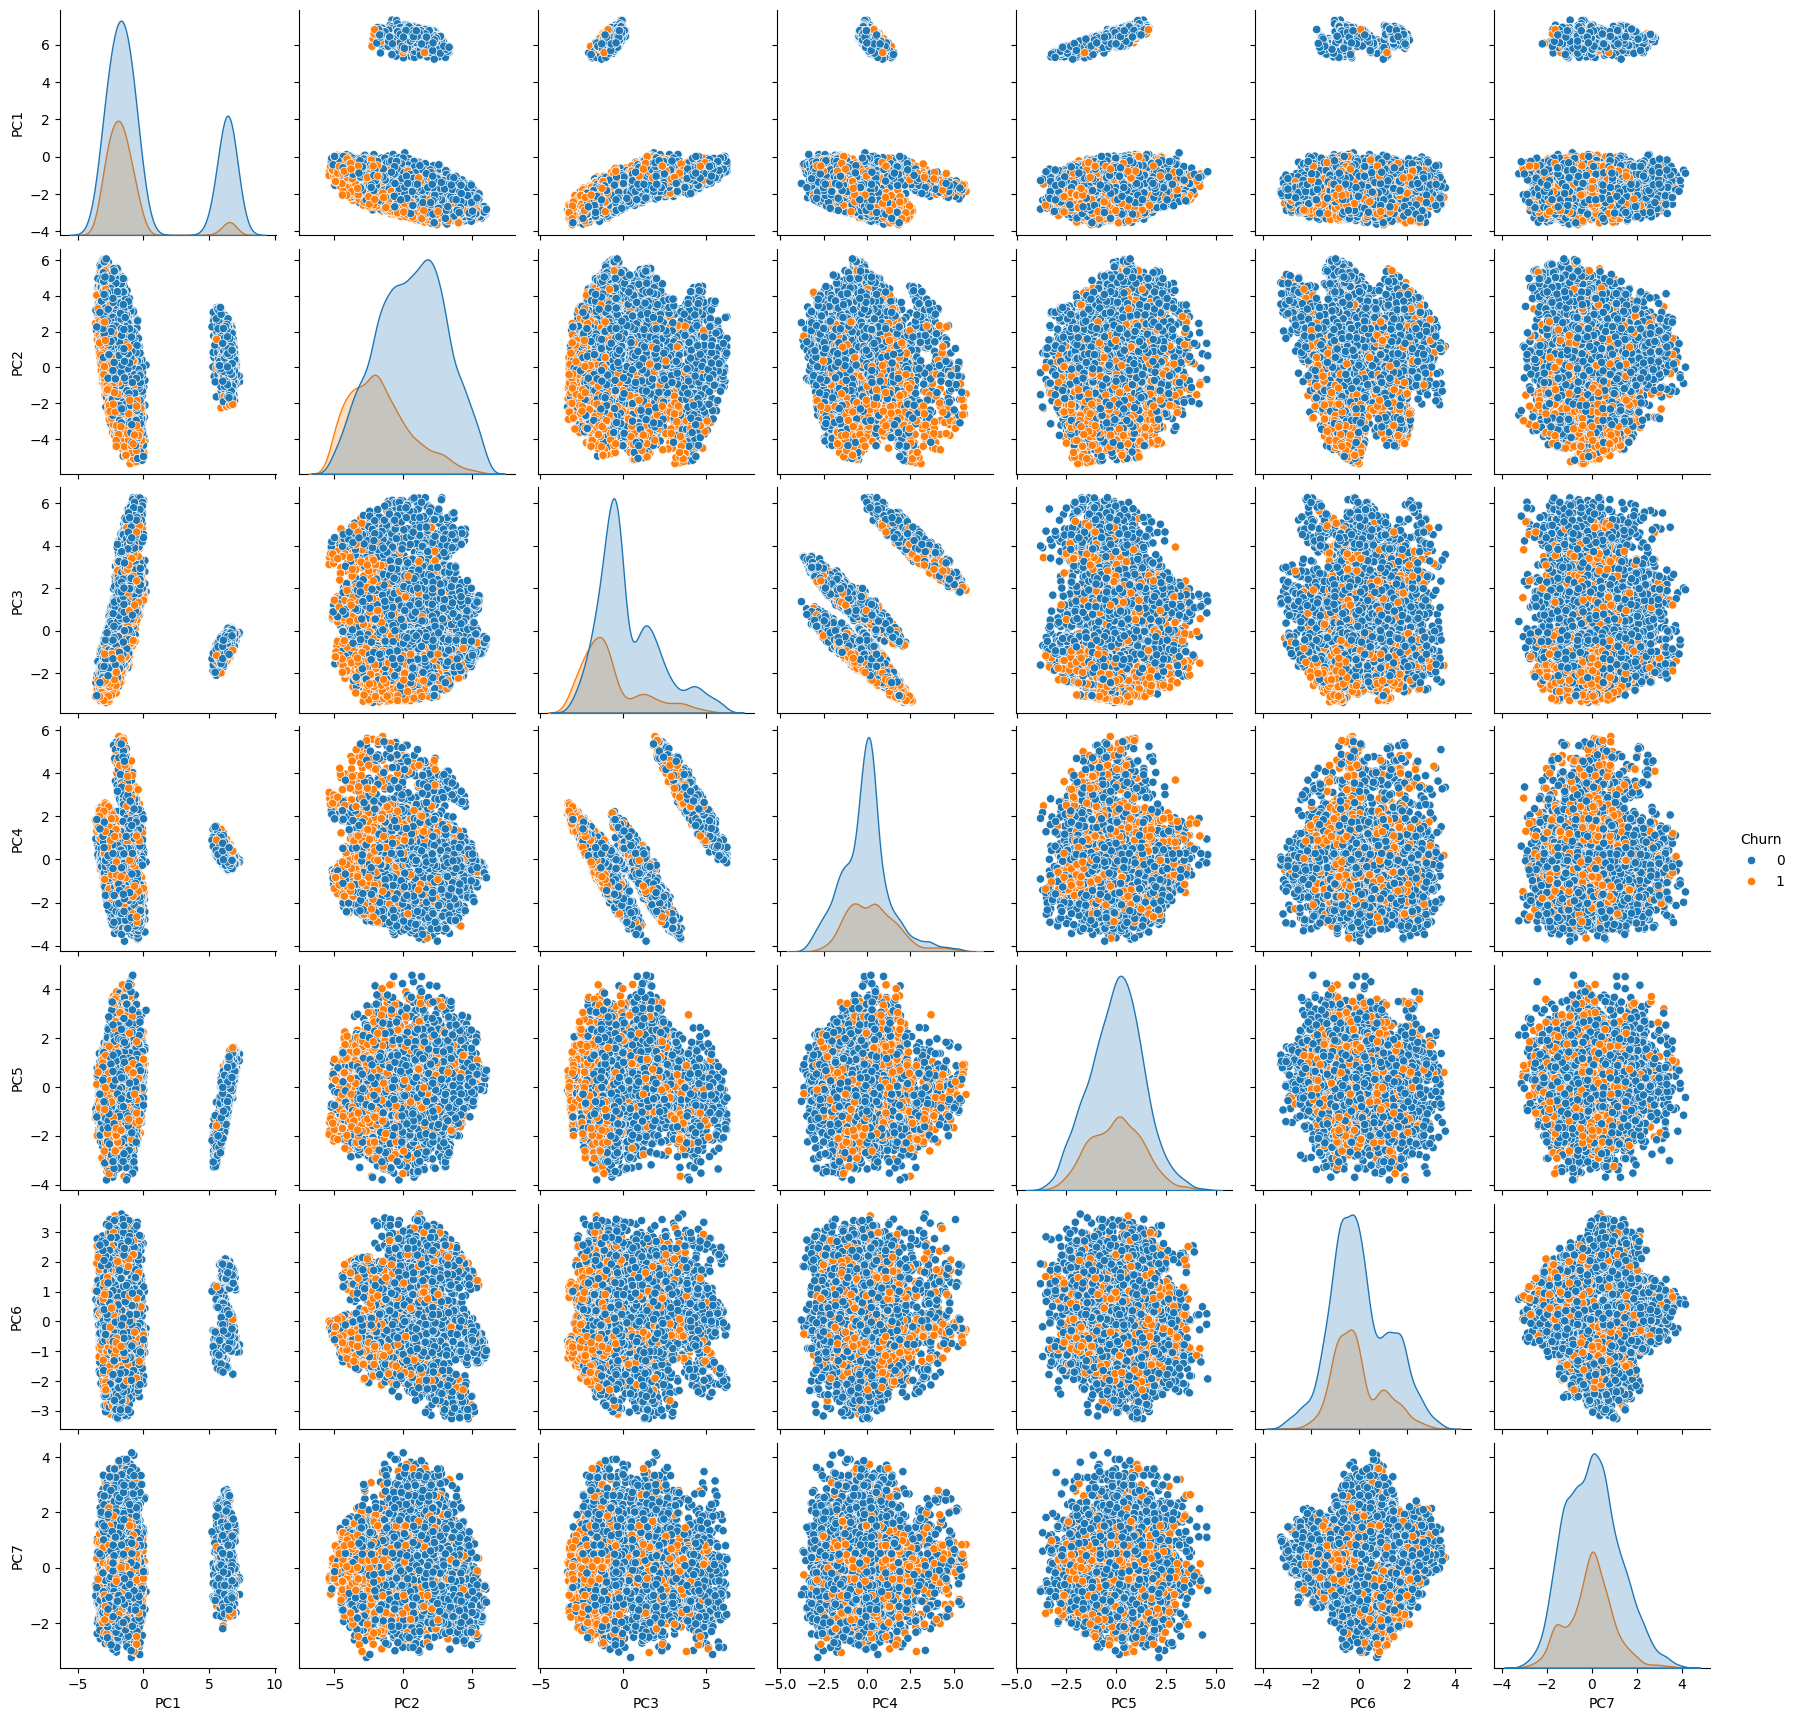

In [147]:
pca_7 = PCA_n(data, label, 7)
sns.pairplot(pca_7, hue = 'Churn')

## Clustering

In [167]:
# Load your dataset
data_cluster = pca_7.iloc[:,:-1].copy()

# Choose the number of clusters (k)
k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_cluster['cluster'] = kmeans.fit_predict(data_cluster)

In [168]:
data_cluster


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster
0,-0.939593,-4.271942,3.507033,2.399113,-2.033296,1.422598,-1.400662,3
1,-0.312426,-0.882547,2.522030,-2.093041,1.571627,0.859467,1.708322,0
2,-0.361862,-3.232383,1.900770,-2.331382,0.846048,1.299608,-2.093863,0
3,-0.749018,0.401225,5.722266,0.979625,-0.116060,0.225574,1.431383,3
4,-1.459139,-4.433296,-1.229630,-0.880732,0.042437,-0.068268,0.190225,0
...,...,...,...,...,...,...,...,...
7038,-1.476627,2.119628,1.244174,0.260095,2.806081,-1.045454,1.737989,1
7039,-2.985249,4.081278,-1.674206,0.549508,-0.601375,2.045756,1.509964,1
7040,-0.876803,-3.203736,4.366903,1.574474,-1.875663,-0.824315,0.889683,3
7041,-1.694243,-3.313460,-1.284282,-0.799172,-1.766418,-0.838117,0.009287,0


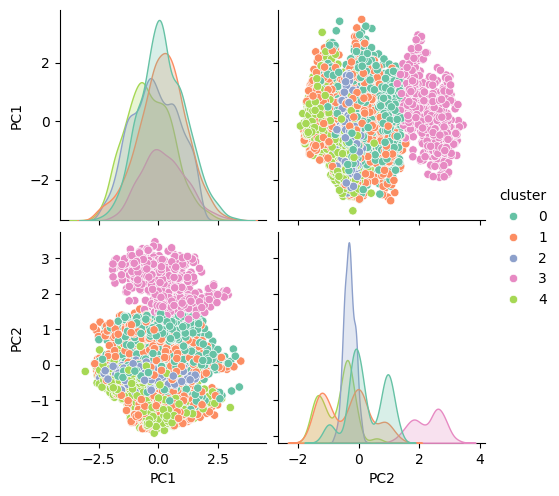

In [169]:
pca_cluster = PCA_n(data_cluster.iloc[:,:-1], data_cluster.iloc[:,-1], 2)
sns.pairplot(pca_cluster, hue = 'cluster',palette="Set2")

In [170]:
pca_cluster['cluster']

0       3
1       0
2       0
3       3
4       0
       ..
7038    1
7039    1
7040    3
7041    0
7042    1
Name: cluster, Length: 7043, dtype: int32

In [174]:
pca_cluster['Churn'] = np.where(((pca_cluster['cluster'] == 4)|(pca_cluster['cluster'] == 4)), 1, 0)


In [183]:
f1_score(label,pca_cluster['Churn'], average='weighted')

0.7196523531227766